# `sequgen` demo

Print the version of the library as used in this demonstration:

In [1]:
from sequgen.__version__ import __version__


__version__

'0.1.0'

Import core classes and run `sequgen`'s minimum viable product:

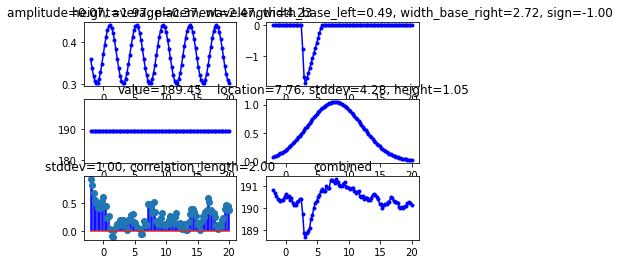

In [2]:
from matplotlib import pyplot as plt
import numpy
from sequgen.deterministic.sine import sine as signal1
from sequgen.deterministic.triangular_peak import triangular_peak as signal2
from sequgen.deterministic.constant import constant as signal3
from sequgen.deterministic.normal_peak import normal_peak as signal4
from sequgen.stochastic.gaussian import gaussian as noise1
from sequgen.parameter_space import ParameterSpace
from sequgen.dimension import Dimension


def test_five_models():

    def visualize():
        plt.figure()

        # plot signal 1
        plt.subplot(3, 2, 1)
        plt.plot(t_predict, y_predict_signal1, ".b-")
        plt.title(signal1_parameter_space.format_str().format(**signal1_parameters))

        # plot signal 2
        plt.subplot(3, 2, 2)
        plt.plot(t_predict, y_predict_signal2, ".b-")
        plt.title(signal2_parameter_space.format_str().format(**signal2_parameters))

        # plot signal 3
        plt.subplot(3, 2, 3)
        plt.plot(t_predict, y_predict_signal3, ".b-")
        plt.title(signal3_parameter_space.format_str().format(**signal3_parameters))

        # plot signal 4
        plt.subplot(3, 2, 4)
        plt.plot(t_predict, y_predict_signal4, ".b-")
        plt.title(signal4_parameter_space.format_str().format(**signal4_parameters))

        # plot noise 1
        plt.subplot(3, 2, 5)
        plt.stem(t_predict, y_predict_noise1, ".b-")
        plt.title(noise1_parameter_space.format_str().format(**noise1_parameters))

        # plot everything stacked
        plt.subplot(3, 2, 6)
        plt.plot(t_predict, y_predict, ".b-")
        plt.title("combined")

        plt.show()

    # where I want the model to predict values
    t_predict = numpy.linspace(-2, 20, 100)

    # signal1: sine
    signal1_parameter_space = ParameterSpace([
        Dimension("amplitude", 0, 1),
        Dimension("average", 0.1, 0.9),
        Dimension("wavelength", 3, 5),
    ])

    # signal2: triangular_peak
    signal2_parameter_space = ParameterSpace([
        Dimension("height", 1, 2),
        Dimension("placement", 0, 20),
        Dimension("width_base_left", 0.1, 0.5),
        Dimension("width_base_right", 2.0, 3.0),
        Dimension("sign", -1)
    ])

    # signal3: constant
    signal3_parameter_space = ParameterSpace([
        Dimension("value", 100, 200)
    ])

    # signal4: normal_peak
    signal4_parameter_space = ParameterSpace([
        Dimension("location", 3, 10),
        Dimension("stddev", 4, 6),
        Dimension("height", 0.5, 2)
    ])

    # noise1: gaussian (colored)
    noise1_parameter_space = ParameterSpace([
        Dimension("stddev", 1),
        Dimension("correlation_length", 2)
    ])

    # draw a sample of the parameter space for each space
    signal1_parameters = signal1_parameter_space.sample()
    signal2_parameters = signal2_parameter_space.sample()
    signal3_parameters = signal3_parameter_space.sample()
    signal4_parameters = signal4_parameter_space.sample()
    noise1_parameters = noise1_parameter_space.sample()

    # generate predictions of y at t_predict using the model and the parameterization
    y_predict_signal1 = signal1(t_predict, **signal1_parameters)
    y_predict_signal2 = signal2(t_predict, **signal2_parameters)
    y_predict_signal3 = signal3(t_predict, **signal3_parameters)
    y_predict_signal4 = signal4(t_predict, **signal4_parameters)
    y_predict_noise1 = noise1(t_predict, **noise1_parameters)

    # combine signal and noise time series
    y_predict = y_predict_signal1 + y_predict_signal2 + y_predict_signal3 + y_predict_signal4 + y_predict_noise1

    # plot to verify
    visualize()


if __name__ == "__main__":
    test_five_models()
